In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #(x_train) genellikle input datası için kullanılır. (y_train)labellar için kullanılır

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
 x_train.shape # 60000 tane  28x28 lik image olduğunu gösterir yani input değerlerimizin shape'ini aldık

(60000, 28, 28)

In [ ]:
x_valid = x_train[48000:] #48000 taneyi train'e attık geri kalan 12000 taneyi de valid'de attık
y_valid = y_train[48000:]

x_train = x_train[:48000]
y_train = y_train[:48000]

In [ ]:
x_valid.shape #kontrol ettik ve bunuda  12000 image' düştü

(12000, 28, 28)

In [ ]:
x_train.shape #kontrol ettik ve train deki image'ler 48000'e düştü

(48000, 28, 28)

In [ ]:
y_valid.shape # buradada sadece tek boyut var. yukarıdakilere karşılık gelen etiket değerleri var

(12000,)

In [ ]:
print("x_train.shape:",x_train.shape)
print(x_train.shape[0],"train örnekleri")
print(x_valid.shape[0],"valid örnekleri")
print(x_test.shape[0],"test örnekleri")

x_train.shape: (48000, 28, 28)
48000 train örnekleri
12000 valid örnekleri
10000 test örnekleri


In [ ]:
index = 900
print("binary")
plt.imshow(x_test[index], cmap = plt.cm.binary)
plt.show()
print(y_test[index])

In [ ]:
# model eğitim önce 4 boyuta çevirmemiz lazım (x, 28, 28, 1)
x_train = x_train.reshape(x_train.shape[0],28,28,1)  # burada sanal bazlı katman ekliyoruz
x_valid = x_valid.reshape(x_valid.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

print(x_valid.shape)
print(x_test.shape)
print(x_train.shape)

In [ ]:
print(y_train.shape) # y_train değişmiyor. sadece input değerlerimiz ile oynuyoruz y'lerin hepsi etiket

(48000,)


In [ ]:
print(y_test.shape)

(10000,)


In [ ]:
print(x_train.dtype)

uint8


In [ ]:
x_train[0]

In [ ]:
x_train = x_train.astype("float32")
x_valid = x_valid.astype("float32")
x_test = x_test.astype("float32")

In [ ]:
# piksel değerleri normalizasyonu
# (0-255) --> (0-1)
x_train /= 255
x_valid /= 255
x_test /= 255

In [ ]:
x_train[0]

In [ ]:
# label düzenleme
# 0 = [1000000000]
# 5 = [0000010000]

y_train[0]

5

In [ ]:
y_train[90]

6

In [ ]:
y_train = to_categorical(y_train, 10) # burada 10 tane sınfımız var 0123456789 bunu belirttik ve yukarıdaki formata dönüştürdük to_categorical fonkiyonu ile
y_valid = to_categorical(y_valid, 10) # sınıf dediğimiz output'umuz
y_test = to_categorical(y_test, 10)  # aslında bi anlamda da burada etiketleme işlemini yaptık

In [ ]:
y_train[90]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
# sınıflandırma, veriyi hazırlama kısmı bitti. Şimdi modelleme kısmına geçeceğiz
my_model = Sequential()
my_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
my_model.add(MaxPooling2D(pool_size=(2,2)))
my_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu') )
my_model.add(MaxPooling2D(pool_size=(2,2)))

my_model.add(Flatten()) # tek boyuta indirgeme işlemi
my_model.add(Dense(32, activation='relu')) # classification işlemi.
my_model.add(Dense(10, activation='softmax')) # classification işlemi

In [ ]:
my_model.summary() # modelin özetine bakıyoruz

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 32)                5

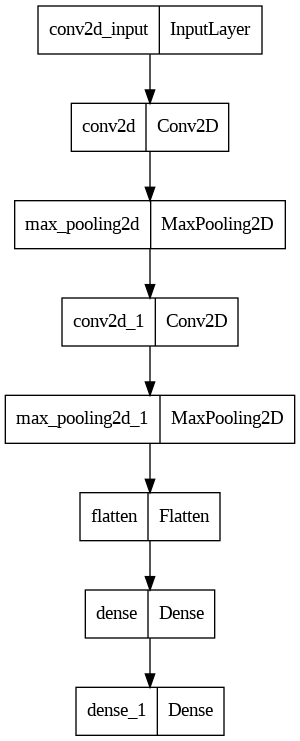

In [ ]:
from keras.utils import plot_model # modelimizin şablonuna bakıyoruz
plot_model(my_model)

In [ ]:
# modeli compile ediyoruz
my_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# modeli eğitime sokuyoruz
# daha önceden hazırlanmış x_train datalarını ve onlara karşılık gelen etiketleri veriyoruz
# bu parametre makine öğrenirken verileri kaçar tane çekip öğreneceğini belirtiyor. 128 tane alıyor öğreniyor yeni 128'i alıyor. ram'imize göre değişitirebiliriz
# data'yı kaç defa tarayacağı değerdir yani 3 defa baştan sona tarayacaktır. gerçek hayatta 100-1000-10000 gibi sayılardır
history = my_model.fit(x_train, y_train,
          batch_size=128,
          epochs=3,
          verbose=1,
          validation_data=(x_valid, y_valid)) # val_accuracy değerinin 1'e yakın olması önemli 100 resimden 98'ini doğru tahmin edebiliyor anlamına geliyor.
          # accuracy ve val_accuracy değerlerinin birbirlerine yakın olmasıda önemli

Epoch 1/3
375/375 [==============================] - 21s 55ms/step - loss: 0.3188 - accuracy: 0.9062 - val_loss: 0.1085 - val_accuracy: 0.9682
Epoch 2/3
375/375 [==============================] - 20s 53ms/step - loss: 0.0838 - accuracy: 0.9747 - val_loss: 0.0731 - val_accuracy: 0.9792
Epoch 3/3
375/375 [==============================] - 20s 53ms/step - loss: 0.0598 - accuracy: 0.9813 - val_loss: 0.0661 - val_accuracy: 0.9805


In [ ]:
score = my_model.evaluate(x_test, y_test, verbose=1) # verbose parametresi debug modda asşağıdaki ve yukarıdaki görüntüyü görmek için yazarız
print("test loss:", score[0])
print("test accuracy:", score[1])
# modeli eğittik ve bir kere eğitiriz her seferinde eğitemeyiz.  modeli bir sefer gerçek(doğru) data ile eğitiriz ve kaydederiz.

313/313 [==============================] - 2s 8ms/step - loss: 0.0483 - accuracy: 0.9850
test loss: 0.04826787859201431
test accuracy: 0.9850000143051147


In [ ]:
my_model.save("my_first_mnist_model_.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#download images
!wget -O test_digit_0.png https://i.stack.imgur.com/FK0FB.png

--2023-12-24 11:09:10--  https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/02/sample_image.png
Resolving 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com)... failed: Name or service not known.
wget: unable to resolve host address ‘3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com’
--2023-12-24 11:09:10--  https://i.stack.imgur.com/FK0FB.png
Resolving i.stack.imgur.com (i.stack.imgur.com)... 146.75.92.193
Connecting to i.stack.imgur.com (i.stack.imgur.com)|146.75.92.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4934 (4.8K) [image/png]
Saving to: ‘test_digit_0.png’

test_digit_0.png    100%[===================>]   4.82K  --.-KB/s    in 0s      

2023-12-24 11:09:10 (54.9 MB/s) - ‘test_digit_0.png’ saved [4934/4934]



In [ ]:
plt.imshow(plt.imread("test_digit_0.png"), cmap = plt.cm.binary)
plt.show()

In [ ]:
plt.imshow(plt.imread("test_digit_7.jpg"), cmap = plt.cm.binary)
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [ ]:
my_model = load_model("my_first_mnist_model_.h5")

In [ ]:
print(my_model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense_1/Softmax:0', description="created by layer 'dense_1'")


In [ ]:
image = load_img("testdigit5.png", target_size = (28,28), color_mode="grayscale") # resimin boyutunu güncelledik ve grayscale yaptık
image = img_to_array(image) / 255 #  önce fotoğrafı array'e dönüştürüyor sonra renkleri 0-255 ---> 0-1 dönüştürüyor.
image = np.expand_dims(image, axis=0) # bir tane daha boyut atadık 4 boyutlu olabilmesi için. axis=0'ın sebebi shape dizisinin ilk elemanına 1.elemanına ata demek
print("shape: ", image.shape)

shape:  (1, 28, 28, 1)


In [ ]:
preds = my_model.predict(image)

1/1 [==============================] - 0s 20ms/step


In [ ]:
preds # tahmin sonuçlarının array şeklinde sunulması. hangisi daha büyükse array'de tahminini sonucu odur

array([[6.4018673e-06, 1.1209831e-07, 1.3480188e-04, 3.7567979e-01,
        1.7463517e-08, 5.2976435e-01, 4.7917718e-05, 9.2699461e-02,
        4.8101682e-04, 1.1861727e-03]], dtype=float32)

In [ ]:
preds.argmax() # yukarıdaki array'de hangi sayının büyük olduğunu bu fonksiyonu kullanarak indeksini görebiliriz

5

In [ ]:
# burada projemiz bitiyor

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


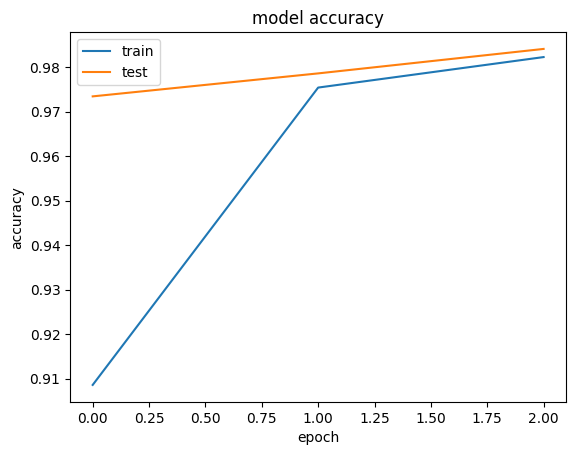

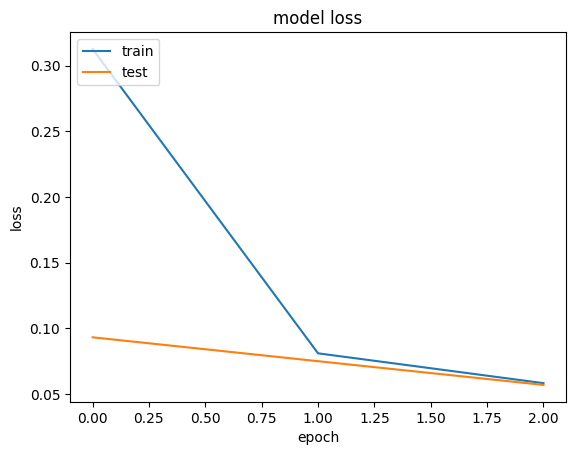

In [ ]:
print(history.history.keys())

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"], loc = "upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","test"], loc = "upper left")
plt.show()

In [ ]:
# Bonus : https://scs.ryerson.ca/~aharley/vis/conv/
# site yasaklanmış. Burada simüle edilmiş şeklini görüyorduk
# cnn katmanının, max-pooling katmanının aşamalarını görüyorduk yazıyı kendimiz yazarak.3